In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
from n2lite import n2lite
import pickle

In [ ]:
beam = '5r'

In [15]:
path = '20181110_041520'

d = n2lite.N2lite('/home/amigos/data/sql/hemt_sweep/'+path+'/param.db')
D = d.read_pandas_all()
d_roach = n2lite.N2lite('/home/amigos/data/sql/hemt_sweep/'+path+'/roach2.db')
D_roach = _d.read_pandas_all()

In [16]:
initial_vg1 = -2.0
final_vg1 = 2.0
initial_vg2 = -2.0
final_vg2 = 2.0
step = 0.1
roop_vg1 = int((final_vg1- initial_vg1) / step) + 1
roop_vg2 = int((final_vg2- initial_vg2) / step) + 1
bins_vg1 = numpy.arange(initial_vg1, final_vg2 + 0.1, 0.1)
bins_vg2 = numpy.arange(initial_vg2, final_vg2 + 0.1, 0.1)
offset_hot_vg1 =  - (final_vg1 + numpy.mean(D['hemt_vg1_{}'.format(beam)][0:100]))
offset_hot_vg2 = - (final_vg2 + numpy.mean(D['hemt_vg2_{}'.format(beam)][0:100]))
D['hemt_vg1_5r'] = D['hemt_vg1_5r'] + offset_hot_vg1
D['hemt_vg2_5r'] = D['hemt_vg2_5r'] + offset_hot_vg2

In [17]:
def sort_vg1(x):
    mask = 0.05
    for i in range(len(bins_vg1)):
        if x >= bins_vg1[i] - mask and x < bins_vg1[i] + mask: return i
        continue
def sort_vg2(x):
    mask = 0.05
    for i in range(len(bins_vg2)):
        if x >= bins_vg2[i] - mask and x < bins_vg2[i] + mask: return i
        continue

In [18]:
D['x'] = D['hemt_vg1_5r'].apply(sort_vg1)
D['y'] = D['hemt_vg2_5r'].apply(sort_vg2)

In [20]:
thot= D_roach['time5_1']
hot_spec = D_roach['data5_1']
hot_total = [sum(hot_spec[i]) for i in range(len(hot_spec))]
hot = pandas.DataFrame(hot_total)
roach = pandas.concat([thot, hot],axis =1)
roach.columns = ['data_time', 'power']

(100, 1000)

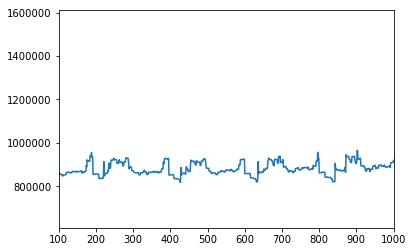

In [61]:
roach
plt.plot(roach['power'])
plt.xlim(100, 1000)

In [30]:
idx = [[D['y'][D['y'] == _y][D['x'] == _x].index for _y in range(41)] for _x in range(41)]

In [50]:
vg1 = [[[numpy.mean(D['hemt_vg1_5r'][D['x']== _x][D['y']== _y])] for _y in range(roop_vg1) ] for _x in range(roop_vg1)]
vg2 = [[[numpy.mean(D['hemt_vg2_5r'][D['x']== _x][D['y']== _y])] for _y in range(roop_vg2) ] for _x in range(roop_vg2)]

In [37]:
time = [
    [
        D['time'][__idx] for __idx in _idx
    ] 
    for _idx in idx
]

separate_time = [
    [
        [min(__time), max(__time)] 
        for __time in _time
    ] 
    for _time in time 
]

In [38]:
idx_roach = [
    [
        [
            _ for _, _t in enumerate(roach['data_time']) if __time[0] < _t < __time[1]
        ]
        for __time in _time
        ]
    for _time in separate_time
]

In [42]:
power = [[roach['power'][__idx] for __idx in _idx] for _idx in idx_roach]

In [44]:
power_ave = [[[numpy.mean(__power)] for __power in _power ] for _power in power]

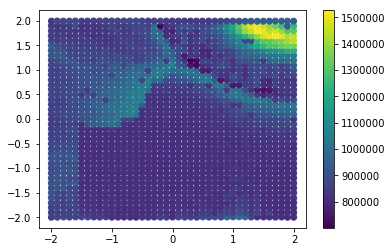

In [51]:
plt.scatter(vg1, vg2, c=power_ave)
#matplotlib.pyplot.clim(5e16,2e17)
plt.colorbar()

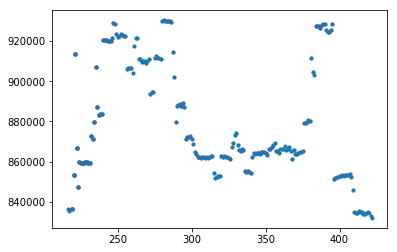

In [55]:
[plt.plot(power[1][i], '.') for i in range(roop_vg1)]
plt.show()

[836200, 853208, 913535, 866503]